In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [34]:
mer = Table.read('/home/aalvarez/Work/Data/SC7/Pipelines/PS_DEV_PHZProduction_20200310-VALIDATION-nmorisse-PLAN-0001-2020-04-24-21-48-02-12/EUC_MER_FINAL-CAT_8BD1D7_20200424T080307.090421Z_00.00.fits')

In [3]:
cosmos = Table.read('/home/aalvarez/Work/Data/Cosmos/COSMOS2015_Laigle+_v1.1.fits')
idx = np.arange(len(cosmos))
np.random.shuffle(idx)
cosmos = cosmos[idx[:len(mer)]]
for c in [c for c in cosmos.colnames if 'FLUX' in c]:
    cosmos[c][cosmos[c] < 0] = np.nan

/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [4]:
target_catalog_filters = [
    #('FLUX_U_EXT_LSST_APER', 'FLUXERR_U_EXT_LSST_APER'),
    ('FLUX_G_EXT_LSST_APER', 'FLUXERR_G_EXT_LSST_APER'),
    ('FLUX_R_EXT_LSST_APER', 'FLUXERR_R_EXT_LSST_APER'),
    ('FLUX_I_EXT_LSST_APER', 'FLUXERR_I_EXT_LSST_APER'),
    ('FLUX_Z_EXT_LSST_APER', 'FLUXERR_Z_EXT_LSST_APER'),
    ('FLUX_VIS_APER', 'FLUXERR_VIS_APER'),
    ('FLUX_Y_APER', 'FLUXERR_Y_APER'),
    ('FLUX_J_APER', 'FLUXERR_J_APER'),
    ('FLUX_H_APER', 'FLUXERR_H_APER')
]
n_filters = len(target_catalog_filters)

In [5]:
cosmos_eq = {
    'FLUX_G_EXT_LSST_APER': ('B_FLUX_APER3', 'B_FLUXERR_APER3'),
    'FLUX_R_EXT_LSST_APER': ('r_FLUX_APER3', 'r_FLUXERR_APER3'),
    'FLUX_I_EXT_LSST_APER': ('ip_FLUX_APER3', 'ip_FLUXERR_APER3'),
    'FLUX_Z_EXT_LSST_APER': ('zp_FLUX_APER3', 'zp_FLUXERR_APER3'),
    'FLUX_VIS_APER': ('V_FLUX_APER3' , 'V_FLUXERR_APER3'),
    'FLUX_Y_APER': ('Y_FLUX_APER3', 'Y_FLUXERR_APER3'),
    'FLUX_J_APER': ('J_FLUX_APER3', 'J_FLUXERR_APER3'),
    'FLUX_H_APER': ('H_FLUX_APER3', 'H_FLUXERR_APER3')
}

In [38]:
# Offset, constant, variance
err_params = {
    'FLUX_G_EXT_LSST_APER': (0.2, 1.2e-3, 0.04),
    'FLUX_R_EXT_LSST_APER': (0.5, 1.25e-3, 0.08),
    'FLUX_I_EXT_LSST_APER': (0.4, 7.5e-4, 0.08),
    'FLUX_Z_EXT_LSST_APER': (0.4, 9e-4, 0.1),
    'FLUX_VIS_APER': (0.1, 1.9e-3, 0.05),
    'FLUX_Y_APER': (0.7, 3e-2, 0.1),
    'FLUX_J_APER': (0.7, 1e-2, 0.1),
    'FLUX_H_APER': (0.7, 3e-2, 0.1),
}

/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


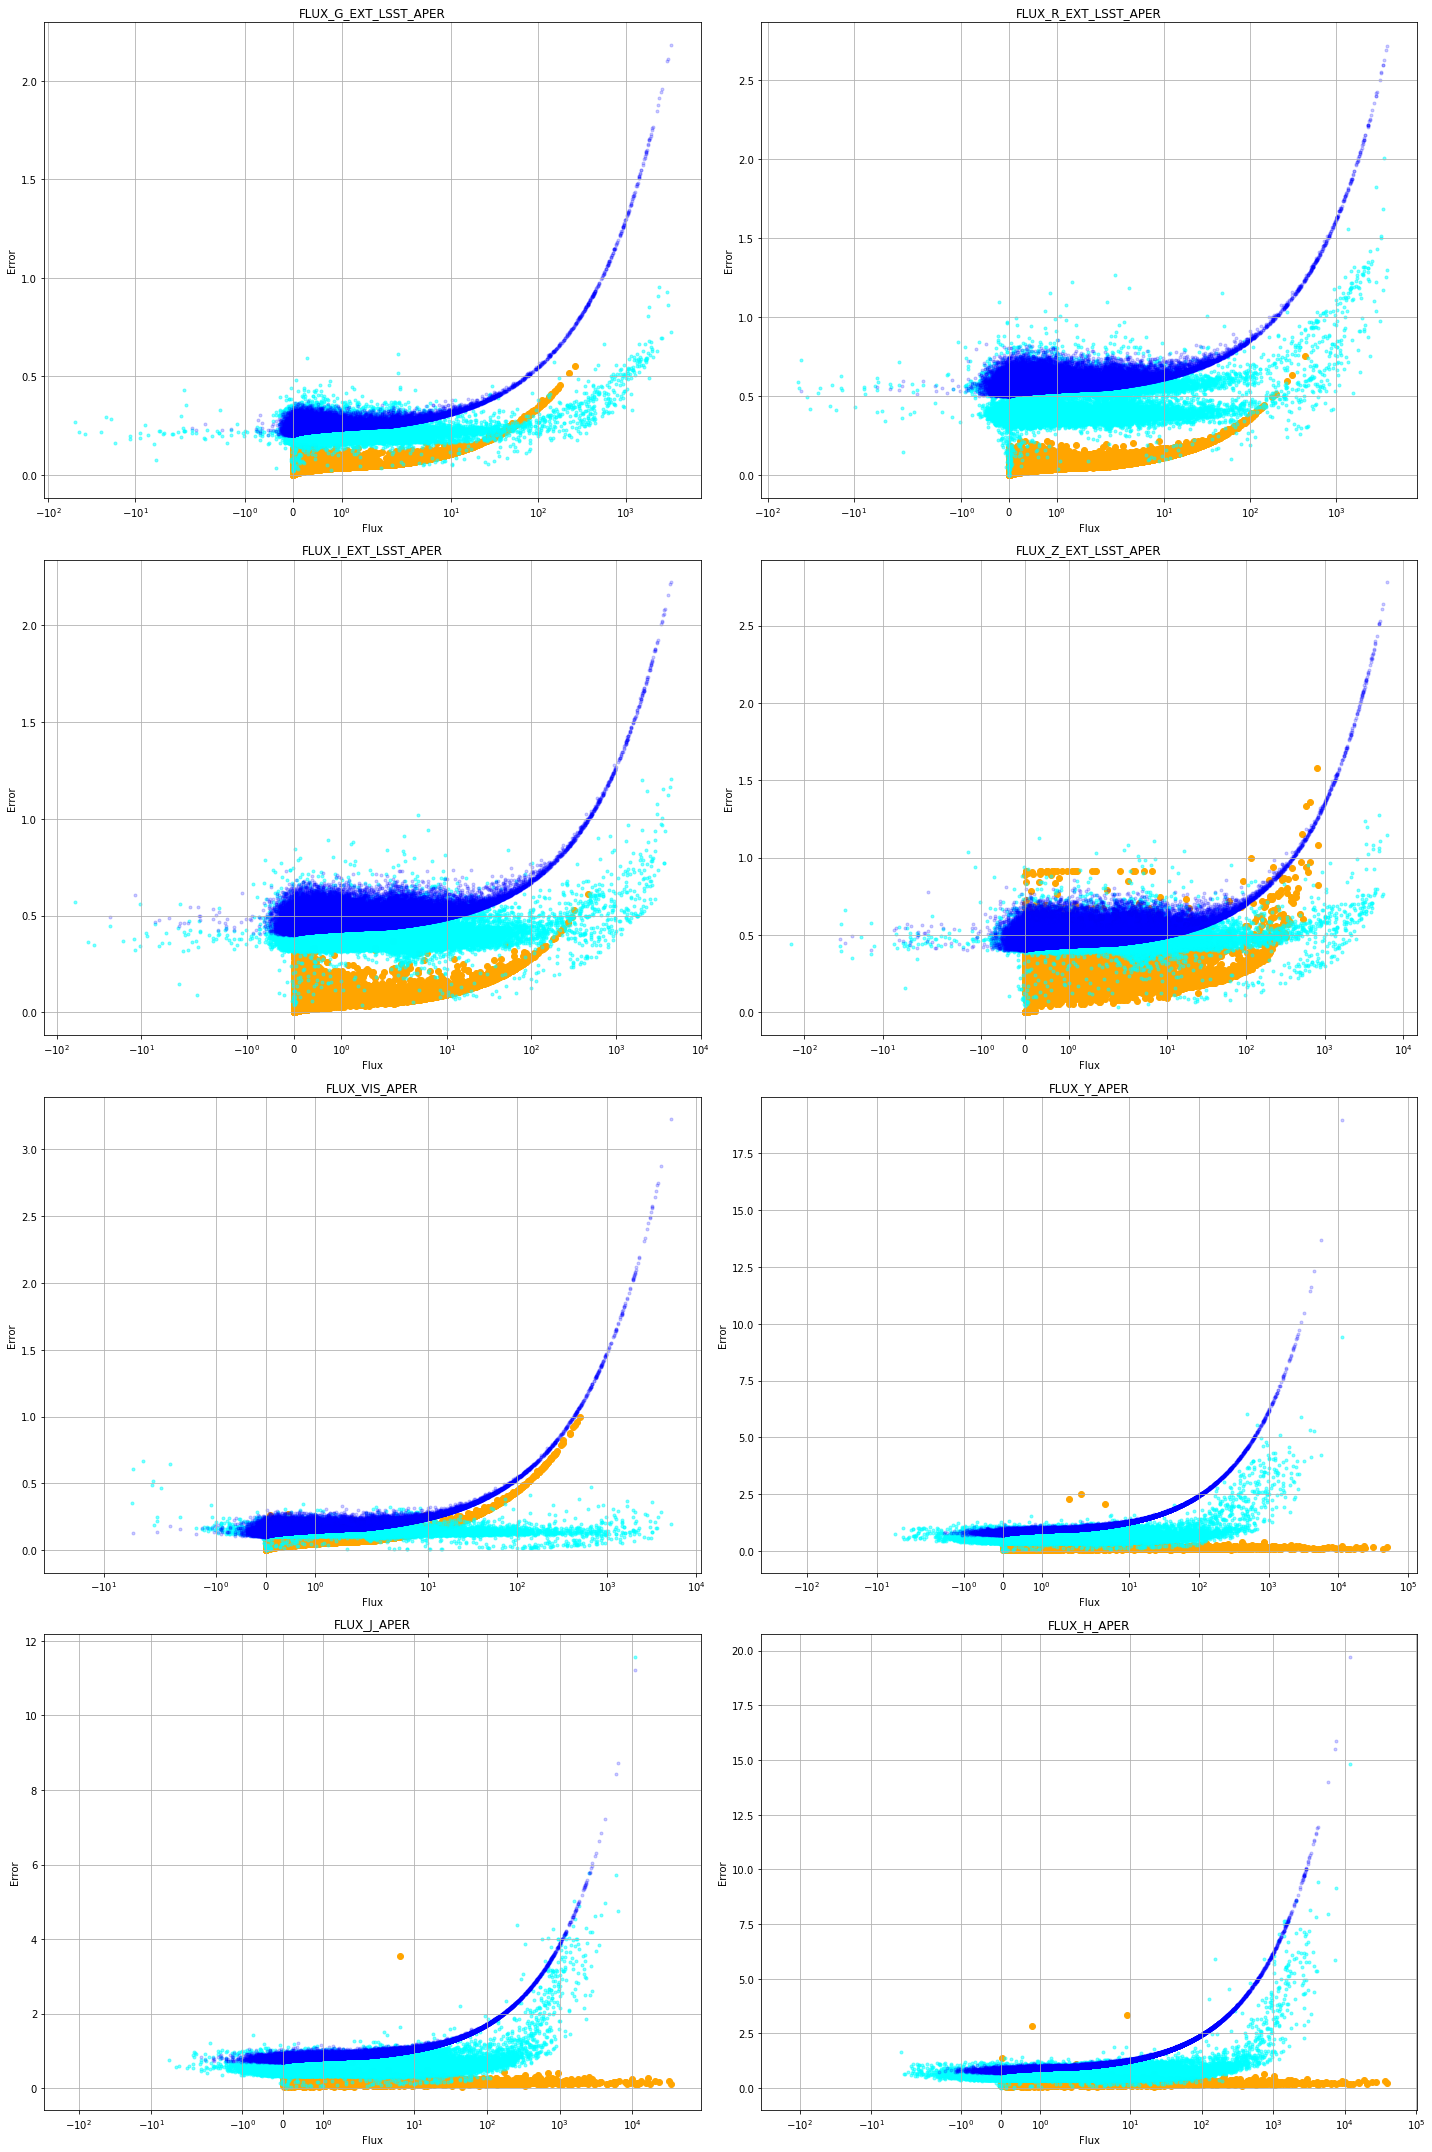

In [40]:
ncols = 2
nrows = n_filters // ncols + (n_filters % ncols > 0)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 30))
axes = axes.ravel()

for i, (flux, error) in enumerate(target_catalog_filters):
    cosmos_flux, cosmos_err = cosmos_eq[flux]
    c = err_params[flux]
    new_error = np.sqrt(np.random.normal(0, c[2], len(mer))**2+mer[flux]*c[1]) + c[0]
    axes[i].scatter(cosmos[cosmos_flux], cosmos[cosmos_err], marker='o', color='orange')
    axes[i].scatter(mer[flux], mer[error], marker='.', color='cyan', alpha=0.5)
    axes[i].scatter(mer[flux], new_error, marker='.', color='blue', alpha=0.2)
    axes[i].set_title(flux)
    axes[i].set_xscale('symlog')
    axes[i].set_xlabel('Flux')
    axes[i].set_ylabel('Error')
    axes[i].grid(True)
    
    mer[error] = new_error
    
plt.tight_layout()

In [41]:
mer.write(
    '/home/aalvarez/Work/Data/SC7/Pipelines/PS_DEV_PHZProduction_20200310-VALIDATION-nmorisse-PLAN-0001-2020-04-24-21-48-02-12/MER_Custom_Errors.fits',
    overwrite=True
)